# Use Case : 
   **To Analyse vehicle's Fuel Efficiency based on vehicle characteristics correlation in python**

      . The dataset of vehicle fuel efficiency is from university of california. 
      . The vehicle characteristics can help explain fuel consumption (mpg).

**Lets Start with Correlating the  vehicle characteristics**

## Correlation

The term "correlation" refers to a **mutual relationship or association** between quantities. In almost any business, it is useful to express one quantity in terms of its relationship with others.

##### So, why is correlation a useful metric?
	
    • Correlation can help in predicting one quantity from another
	• Correlation can (but often does not, as we will see in some examples below) indicate the presence of a causal relationship
	• Correlation is used as a basic quantity and foundation for many other modeling techniques

### Covariance

Covariance is a statistical measure of association between two variables X and Y.


### Pearson Correlation Coefficient:

Pearson is the most widely used correlation coefficient. Pearson correlation measures the **linear association between continuous variables**. In other words, this coefficient quantifies the degree to which a relationship between two variables can be described by a line. 

### Spearman's Correlation:

Spearman's rank correlation coefficient can be defined as a special case of Pearson ρ applied to ranked (sorted) variables. Unlike Pearson, Spearman's correlation is not restricted to linear relationships. Instead, it measures monotonic association (only strictly increasing or decreasing, but not mixed) between two variables and relies on the rank order of values. In other words, ***rather than comparing means and variances, Spearman's coefficient looks at the relative order of values for each variable***. This makes it appropriate to use with both continuous and discrete data.

### Kendall's Tau:

The third correlation coefficient we will discuss is also based on variable ranks. However, unlike Spearman's coefficient, Kendalls' τ does not take into account the difference between ranks — only directional agreement. Therefore, this coefficient is more appropriate for discrete data.


[Click for More information...](https://www.datascience.com/blog/introduction-to-correlation-learn-data-science-tutorials)





# Correlation in Pandas

We begin by importing libraries & reading the dataset from the UCI online data repository and examining first few rows. 

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
path = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

mpg_data = pd.read_csv(path, delim_whitespace=True, header=None,
            names = ['mpg', 'cylinders', 'displacement','horsepower',
            'weight', 'acceleration', 'model_year', 'origin', 'name'],
            na_values='?')

Upon inspecting the dataset, we see that horsepower has six missing values, which pandas' correlation method will automatically drop. Since the number of missing values is small, this setting is acceptable for our illustrative example. However, always make sure that dropping missing values is appropriate for your use case. If that is not the case, there are many existing methods for filling in and handling missing values, such as simple mean imputation.

In [11]:
mpg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null float64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
name            398 non-null object
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


**Pandas provides a convenient one-line method corr() for calculating correlation between data frame columns**. In our fuel efficiency example, we can check whether heavier vehicles tend to have lower mpg by passing the method to specific columns:

In [12]:
mpg_data['mpg'].corr(mpg_data['weight'])

-0.83174093324433507

As expected, there seems to be a *strong negative correlation between vehicle weight and mpg*. But what about horsepower or displacement? Conveniently, pandas can quickly calculate correlation between all columns in a dataframe. The user can also specify the correlation method: Spearman, Pearson, or Kendall. If no method is specified, Pearson is used by default. Here, we drop model year and origin variables and calculate Pearson correlation between all remaining columns of the data frame:



In [13]:
# pairwise correlation
mpg_data.drop(['model_year', 'origin'], axis=1).corr(method='spearman')

,mpg,cylinders,displacement,horsepower,weight,acceleration
mpg,1.000000,-0.821864,-0.855692,-0.853616,-0.874947,0.438677
cylinders,-0.821864,1.000000,0.911876,0.816188,0.873314,-0.474189
displacement,-0.855692,0.911876,1.000000,0.876171,0.945986,-0.496512
horsepower,-0.853616,0.816188,0.876171,1.000000,0.878819,-0.658142
weight,-0.874947,0.873314,0.945986,0.878819,1.000000,-0.404550
acceleration,0.438677,-0.474189,-0.496512,-0.658142,-0.404550,1.000000


Pandas also supports highlighting methods for tables, so it is easier to see high and low correlations. It is important to understand possible correlations in your data, especially when building a regression model. Strongly correlated predictors, phenomenon referred to as multicollinearity, will cause coefficient estimates to be less reliable. Below is an example of calculating Pearson correlation on our data and using a color gradient to format the resulting table:

In [17]:
mpg_data.drop(['model_year', 'origin'], axis=1).corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,mpg,cylinders,displacement,horsepower,weight,acceleration
mpg,1.0,-0.78,-0.8,-0.78,-0.83,0.42
cylinders,-0.78,1.0,0.95,0.84,0.9,-0.51
displacement,-0.8,0.95,1.0,0.9,0.93,-0.54
horsepower,-0.78,0.84,0.9,1.0,0.86,-0.69
weight,-0.83,0.9,0.93,0.86,1.0,-0.42
acceleration,0.42,-0.51,-0.54,-0.69,-0.42,1.0


Finally, to visually inspect the relationship between mpg, weight, horsepower, and acceleration, we can plot these values and calculate **Pearson and Spearman coefficients**. The dataset at hand consists of less than 400 points, which can be easily displayed on a scatter plot. If you are dealing with much larger datasets, consider taking a sample of your data first to speed up the process and produce more readable plots.

In this case, Spearman's coefficient is higher than Pearson for horsepower and weight, since relationship is non-linear. For acceleration, both coefficients are close since the relationship is not as clearly defined:

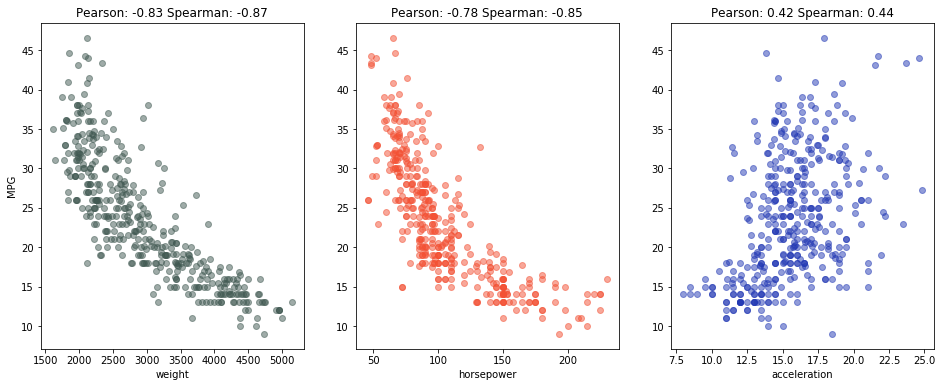

In [18]:
# plot correlated values
plt.rcParams['figure.figsize'] = [16, 6]

fig, ax = plt.subplots(nrows=1, ncols=3)

ax=ax.flatten()

cols = ['weight', 'horsepower', 'acceleration']
colors=['#415952', '#f35134', '#243AB5', '#243AB5']
j=0

for i in ax:
    if j==0:
        i.set_ylabel('MPG')
    i.scatter(mpg_data[cols[j]], mpg_data['mpg'],  alpha=0.5, color=colors[j])
    i.set_xlabel(cols[j])
    i.set_title('Pearson: %s'%mpg_data.corr().loc[cols[j]]['mpg'].round(2)+' Spearman: %s'%mpg_data.corr(method='spearman').loc[cols[j]]['mpg'].round(2))
    j+=1

plt.show()

#### Correlation and Causation
The relationships between variables in our fuel efficiency example were very intuitive and explainable through vehicle mechanics. However, things are not always this straightforward. It is a well known fact that correlation does not imply causation, and therefore, any strong correlation should be thought of critically.

Often, a relationship may appear to be causal through high correlation due to some unobserved variables. For example, the number of grocery stores in a city can be strongly correlated with the number of ice cream creameries. However, there is an obvious hidden variable here — the population size of the city:


#### Final Remarks:
This overview is a primer of correlation types and interpretations. We have introduced three popular correlation methods and demonstrated how to calculate them using pandas. Correlation is a useful quantity in many applications, especially when conducting a regression analysis. While the methods listed here are widely used and cover most use cases, there are other measures of association not covered here, such phi coefficient for binary data or mutual information.



Source : https://www.datascience.com/blog/introduction-to-correlation-learn-data-science-tutorials